In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('water_level.csv',delimiter=";")
dataset

,X,y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965
5,-8.941458,2.121072
6,15.307793,14.710268
7,-34.706266,2.614184
8,1.389154,3.740172
9,-44.383760,3.731691


In [3]:
X = dataset["X"]

In [4]:
X= pd.DataFrame(X)

In [5]:
Y = dataset.iloc[:,-1]

In [6]:
Y = Y.values.reshape(-1,1)

In [7]:
Y = pd.DataFrame(Y)

In [8]:
Y.head()

,0
0,2.134311
1,1.173257
2,34.359109
3,36.837955
4,2.808965


In [9]:
X.head()

,X
0,-15.936758
1,-29.152979
2,36.189549
3,37.492187
4,-48.058829


In [13]:

def poly(X,Y,n):
    errors_train = []
    errors_test = []
    for i in range(1,n+1):
        from sklearn.preprocessing import StandardScaler
        X_s = StandardScaler()
        Y_s = StandardScaler()
        X = X_s.fit_transform(X)
        Y = Y_s.fit_transform(Y)
        from sklearn.model_selection import train_test_split
        X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size= 0.20,random_state=100)
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree = i)
        poly_X_train = poly.fit_transform(X_train)
        poly_X_test = poly.fit_transform(X_test)
        from sklearn.linear_model import LinearRegression
        regressor = LinearRegression()
        regressor.fit(poly_X_train,Y_train)
        errors_train.append(1-regressor.score(poly_X_train,Y_train))
        errors_test.append(1-regressor.score(poly_X_test,Y_test))
    plt.figure(figsize=(12,8))
    plt.style.use("ggplot")
    plt.plot(errors_test,color="red")
    plt.plot(errors_train,color="blue")
    plt.legend(["test error","train error"])
    plt.show()
    return errors_test,errors_train
        

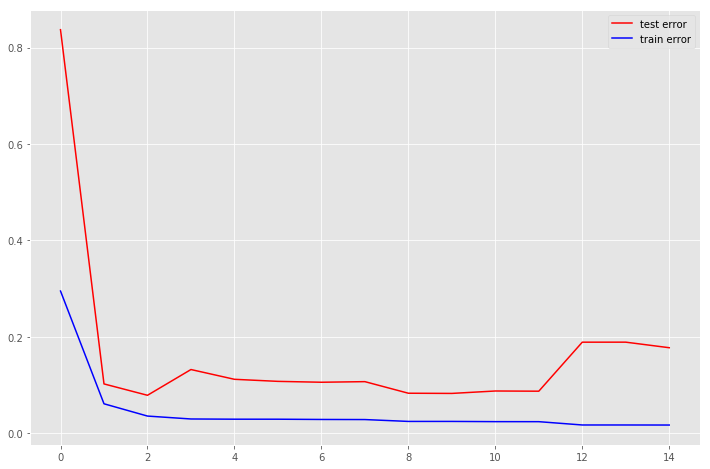

In [14]:
errors_test,errors_train = poly(X,Y,15)

In [12]:
errors_test.index(min(errors_test))

2